# Exploratory data analysis

After preprocessing the data and organizing it into intervals associated with meal times, exploratory data analysis was performed to identify relationships between features and to determine how insulin sensitivity is impacted by external factors. For better visual understanding, the relationships were visualized using scatter plots, with a linear regression line to illustrate the overall trend.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
#Styles setup
#Colors
background = '#F0F0F0'
red = '#ED462F'
pink = '#F1BBB8'
green = '#4CB866'
blue = '#003D83'
black = '#333333'
grey = '#D0D9DC'
white = 'white'

#Matplotlib styling
plt.rcParams['axes.facecolor'] = grey
plt.rcParams['figure.facecolor'] = background
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['xtick.color'] = background
plt.rcParams['ytick.color'] = background
plt.rcParams['xtick.labelcolor'] = '#8C9496'
plt.rcParams['ytick.labelcolor'] = '#8C9496'
plt.rcParams['legend.labelcolor'] = '#8C9496'
plt.rcParams['legend.frameon'] = False
plt.rcParams['grid.color'] = background
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.axisbelow'] = True

In [31]:
df = pd.read_csv('FullData_preprocessed.csv')
df = df.drop('Date', axis=1)
df

,Interval,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
0,lunch-dinner,0.0,3.9,5.6,1.216,3.3,1473.0,False,-11.600000,54.030000,3.931915
1,dinner-breakfast,0.0,5.6,6.2,1.172,2.0,7649.0,False,-12.087879,52.386667,2.638298
2,breakfast-lunch,0.0,4.6,4.9,0.574,3.5,38.0,False,-18.900000,71.030000,3.648936
3,lunch-dinner,0.0,4.9,4.4,0.784,3.5,2516.0,False,-14.100000,56.385000,3.276596
4,dinner-breakfast,2.0,4.4,5.7,0.868,2.5,4627.0,False,-11.857143,54.900714,3.031915
...,...,...,...,...,...,...,...,...,...,...,...
385,breakfast-lunch,0.0,5.3,4.4,0.769,3.0,0.0,False,5.066667,85.370000,2.808511
386,dinner-breakfast,1.0,4.0,6.1,0.812,3.0,11.0,False,11.450000,51.975000,3.893617
387,lunch-dinner,0.0,5.0,3.7,0.900,3.0,5924.0,False,10.800000,58.256667,2.361702
388,dinner-breakfast,0.0,3.7,4.8,0.366,3.0,0.0,False,9.100000,59.300000,3.063830


## 1. General data exploration

In general the short acting insulin delivery is calculated using the following formula:<br>

    high blood glucose correction dose + carbohydrate coverage dose

It is considered that 1 unit of insulin lowers the blood glucose level by 2.8 mmol/L and covers 10g of net carbs or 1 bread unit (the unit that is used for DV). Therefore, the formula can be expressed as:<br>

    (BG1 - 4.7) / 2.8 + DV / 1
    
The formula indicates a direct correlation between pre-meal blood glucose level, carbohydrates consumption, and insulin dose.

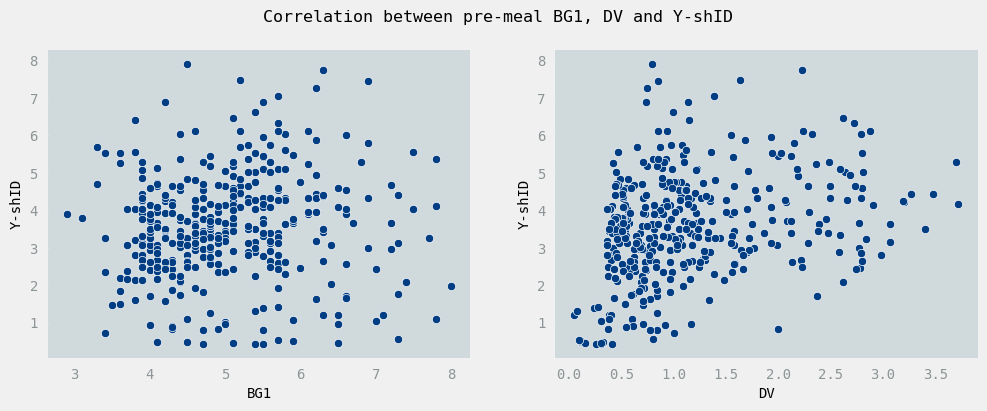

In [32]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.suptitle('Correlation between pre-meal BG1, DV and Y-shID')
sns.scatterplot(data=df,x='BG1',y='Y-shID',color=blue,ax=axes[0])
sns.scatterplot(data=df,x='DV',y='Y-shID',color=blue,ax=axes[1]);

The direct correlation between those features was clearly visible; however, for better visualisation, a simple linear regression algorithm was used to plot an overall trend line on top.

In [33]:
X_BG1 = df[['BG1']]
X_DV = df[['DV']]
y = df[['Y-shID']]
X_pred_BG1 = pd.DataFrame({'BG1':[3,4,5,6,7,8]})
X_pred_DV = pd.DataFrame({'DV':[0,1,2,3,4]})

model = LinearRegression()

model.fit(X_BG1,y)
y_pred_BG1 = model.predict(X_pred_BG1)

model.fit(X_DV,y)
y_pred_DV = model.predict(X_pred_DV)

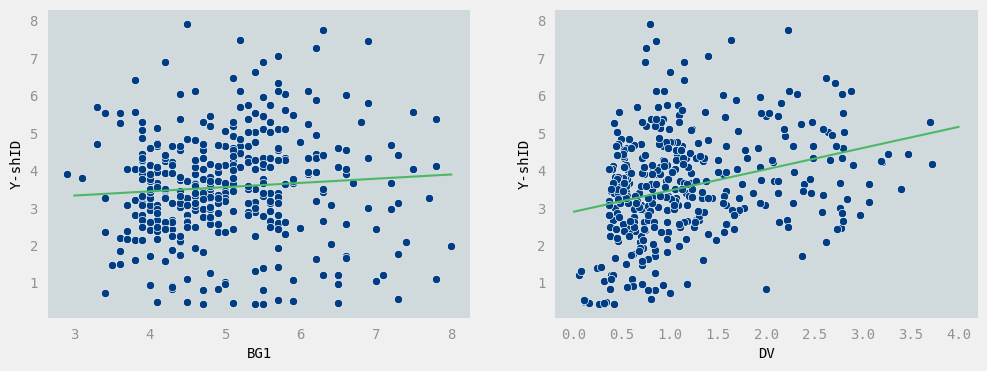

In [34]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.scatterplot(data=df,x='BG1',y='Y-shID',color=blue,ax=axes[0])
axes[0].plot(X_pred_BG1,y_pred_BG1,color=green)
sns.scatterplot(data=df,x='DV',y='Y-shID',color=blue,ax=axes[1])
axes[1].plot(X_pred_DV,y_pred_DV,color=green)

The two graphs demonstrate a moderate correlation between BG1, DV and Y-shID. The relationship between DV and Y-shID is more clear. While there is some degree of variance, this suggests that other factors may also be influencing these variables.

## 2. Deeper data exploration_external factors

To explore the influence of external factors on insulin sensitivity, an additional feature was created - insulin sensitivity (IS), the ratio between the actual insulin delivery and recommended insulin delivery (Y-shID). This feature allowed for an evaluation of how accurately the patient's estimation was working depending on different conditions. If the ratio was lower than 1, that indicated that the injected dose was not sufficient. A ratio higher than 1 suggested that the injected dose was too high. To automate the visualisation process, a pipeline was created. The pipeline included functions for dataframe filtering, scatter plot plotting and regression line plotting.

### Insulin sensitivity (IS)

In [35]:
df.insert(11,'IS',df['shID']/df['Y-shID'])
df

,Interval,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID,IS
0,lunch-dinner,0.0,3.9,5.6,1.216,3.3,1473.0,False,-11.600000,54.030000,3.931915,0.839286
1,dinner-breakfast,0.0,5.6,6.2,1.172,2.0,7649.0,False,-12.087879,52.386667,2.638298,0.758065
2,breakfast-lunch,0.0,4.6,4.9,0.574,3.5,38.0,False,-18.900000,71.030000,3.648936,0.959184
3,lunch-dinner,0.0,4.9,4.4,0.784,3.5,2516.0,False,-14.100000,56.385000,3.276596,1.068182
4,dinner-breakfast,2.0,4.4,5.7,0.868,2.5,4627.0,False,-11.857143,54.900714,3.031915,0.824561
...,...,...,...,...,...,...,...,...,...,...,...,...
385,breakfast-lunch,0.0,5.3,4.4,0.769,3.0,0.0,False,5.066667,85.370000,2.808511,1.068182
386,dinner-breakfast,1.0,4.0,6.1,0.812,3.0,11.0,False,11.450000,51.975000,3.893617,0.770492
387,lunch-dinner,0.0,5.0,3.7,0.900,3.0,5924.0,False,10.800000,58.256667,2.361702,1.270270
388,dinner-breakfast,0.0,3.7,4.8,0.366,3.0,0.0,False,9.100000,59.300000,3.063830,0.979167


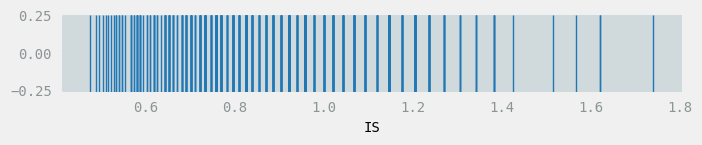

In [36]:
#remove outliers for cleaner picture
plt.figure(figsize=(8,1))
sns.rugplot(data=df, x='IS',height=1);

In [37]:
df[df['IS']>1.5] 

,Interval,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID,IS
34,lunch-dinner,0.0,4.0,2.7,2.37,3.0,3566.0,False,2.2,36.498,1.723404,1.740741
45,lunch-dinner,0.0,6.0,2.9,2.78,4.0,3223.0,False,7.5,21.020,2.468085,1.620690
118,lunch-dinner,0.0,4.5,3.1,2.80,4.0,138.0,False,16.1,15.250,2.638298,1.516129
196,breakfast-lunch,0.0,4.6,3.0,0.69,3.0,0.0,False,14.0,74.345,1.914894,1.566667
353,breakfast-lunch,0.0,3.6,2.9,0.67,3.0,6421.0,False,-16.0,74.480,1.851064,1.620690


In [38]:
df.drop(index=[34,45,118,196,353],inplace=True)

### Pipeline

In [39]:
#create df filtered with a condition
def create_df(df,condition):
    df = df[condition]
    return df   

In [42]:
#plotting function
def plot(df,y_col,axes):
    sns.scatterplot(data=df,
                    x='IS',
                    y=y_col,color=blue,alpha=0.75,ax=axes)
    axes.axvline(x=1, color=red, linestyle='-',linewidth=1)
    
    X = df[['IS']]
    y = df[[y_col]]
    X_pred = pd.DataFrame({'IS':[0.6,1,1.4]})
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X_pred)
    axes.plot(X_pred,y_pred,color=green)   

### External factors for different meal intervals

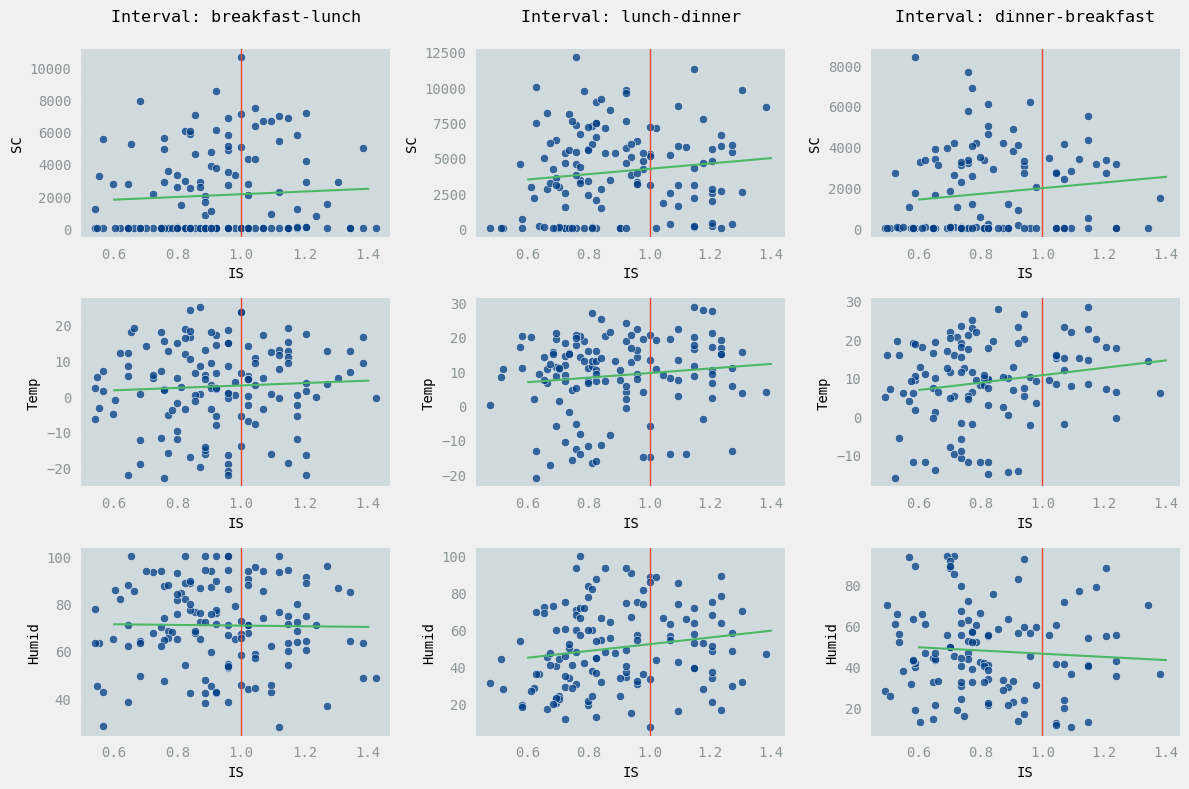

In [43]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(12,8))

plot_0_0 = (df.
            pipe(create_df,df['Interval']=='breakfast-lunch').
            pipe(plot,'SC',axes[0,0]))
axes[0,0].set_title('Interval: breakfast-lunch',pad=20)

plot_1_0 = (df.
            pipe(create_df,df['Interval']=='breakfast-lunch').
            pipe(plot,'Temp',axes[1,0]))

plot_2_0 = (df.
            pipe(create_df,df['Interval']=='breakfast-lunch').
            pipe(plot,'Humid',axes[2,0]))

plot_0_1 = (df.
            pipe(create_df,df['Interval']=='lunch-dinner').
            pipe(plot,'SC',axes[0,1]))
axes[0,1].set_title('Interval: lunch-dinner',pad=20)

plot_1_1 = (df.
            pipe(create_df,df['Interval']=='lunch-dinner').
            pipe(plot,'Temp',axes[1,1]))

plot_2_1 = (df.
            pipe(create_df,df['Interval']=='lunch-dinner').
            pipe(plot,'Humid',axes[2,1]))

plot_0_2 = (df.
            pipe(create_df,df['Interval']=='dinner-breakfast').
            pipe(plot,'SC',axes[0,2]))
axes[0,2].set_title('Interval: dinner-breakfast',pad=20)

plot_1_2 = (df.
            pipe(create_df,df['Interval']=='dinner-breakfast').
            pipe(plot,'Temp',axes[1,2]))

plot_2_2 = (df.
            pipe(create_df,df['Interval']=='dinner-breakfast').
            pipe(plot,'Humid',axes[2,2]))
plt.tight_layout()

### External factors for different BG1 levels

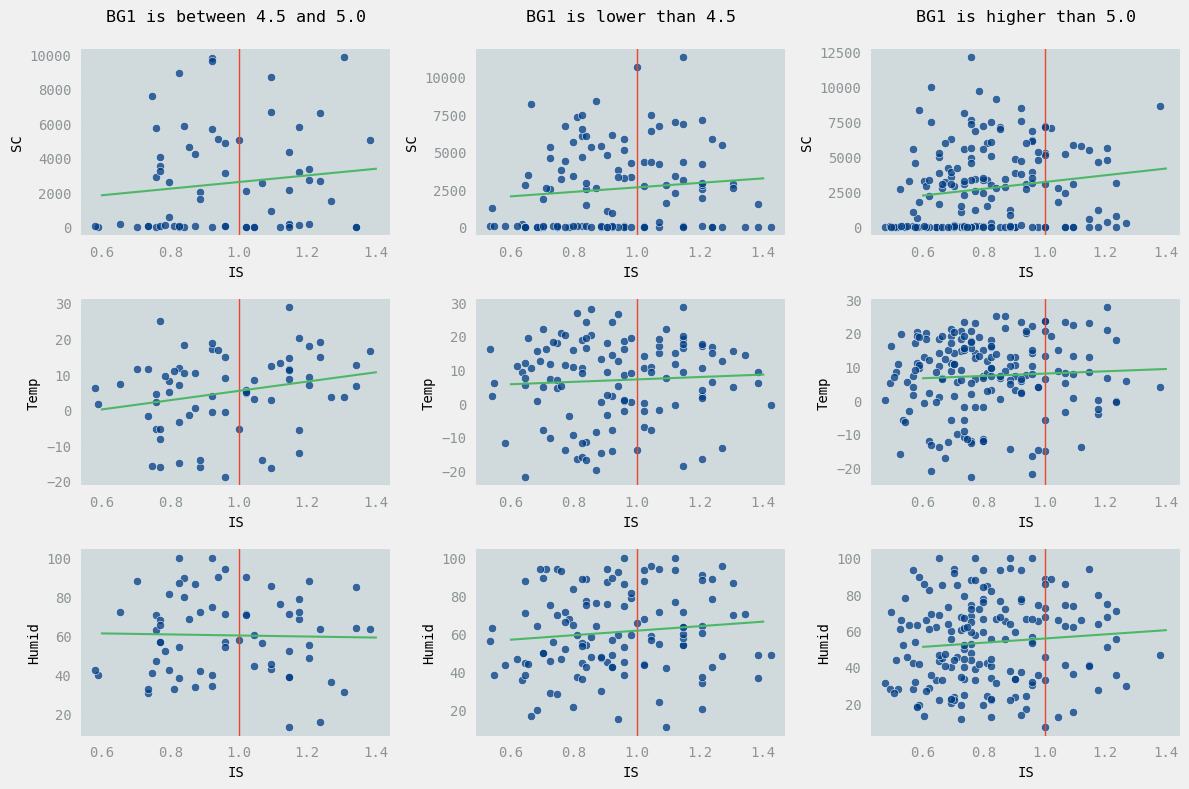

In [44]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(12,8))

plot_0_0 = (df.
            pipe(create_df,(df['BG1']>4.5)&(df['BG1']<5.0)).
            pipe(plot,'SC',axes[0,0]))
axes[0,0].set_title('BG1 is between 4.5 and 5.0',pad=20)

plot_1_0 = (df.
            pipe(create_df,(df['BG1']>4.5)&(df['BG1']<5.0)).
            pipe(plot,'Temp',axes[1,0]))

plot_2_0 = (df.
            pipe(create_df,(df['BG1']>4.5)&(df['BG1']<5.0)).
            pipe(plot,'Humid',axes[2,0]))

plot_0_1 = (df.
            pipe(create_df,df['BG1']<4.5).
            pipe(plot,'SC',axes[0,1]))
axes[0,1].set_title('BG1 is lower than 4.5',pad=20)

plot_1_1 = (df.
            pipe(create_df,df['BG1']<4.5).
            pipe(plot,'Temp',axes[1,1]))

plot_2_1 = (df.
            pipe(create_df,df['BG1']<4.5).
            pipe(plot,'Humid',axes[2,1]))

plot_0_2 = (df.
            pipe(create_df,df['BG1']>5.0).
            pipe(plot,'SC',axes[0,2]))
axes[0,2].set_title('BG1 is higher than 5.0',pad=20)

plot_1_2 = (df.
            pipe(create_df,df['BG1']>5.0).
            pipe(plot,'Temp',axes[1,2]))

plot_2_2 = (df.
            pipe(create_df,df['BG1']>5.0).
            pipe(plot,'Humid',axes[2,2]))

plt.tight_layout()

### External factors for different bID levels

In [45]:
df['bID'].unique()

array([0. , 2. , 4. , 3. , 1. , 6. , 1.5])

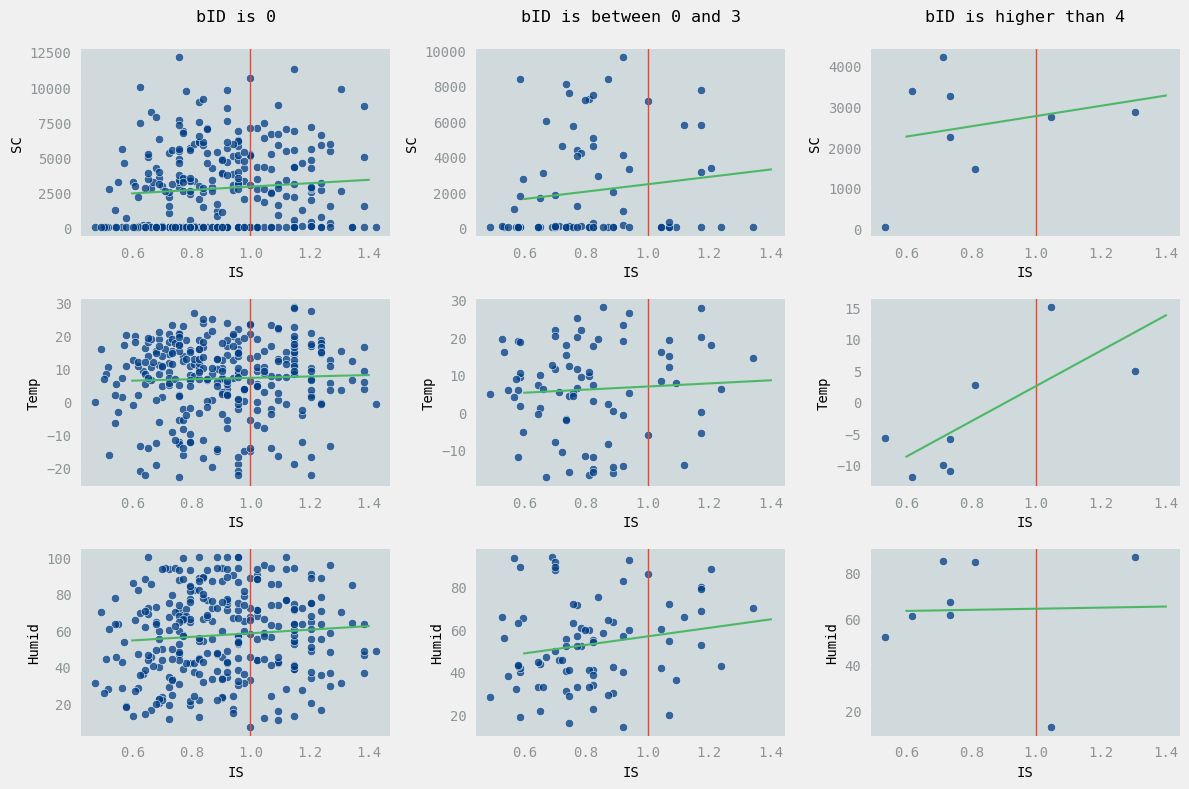

In [46]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(12,8))

plot_0_0 = (df.
            pipe(create_df,df['bID']==0).
            pipe(plot,'SC',axes[0,0]))
axes[0,0].set_title('bID is 0',pad=20)

plot_1_0 = (df.
            pipe(create_df,df['bID']==0).
            pipe(plot,'Temp',axes[1,0]))

plot_2_0 = (df.
            pipe(create_df,df['bID']==0).
            pipe(plot,'Humid',axes[2,0]))

plot_0_1 = (df.
            pipe(create_df,(df['bID']>=1)&(df['bID']<=3)).
            pipe(plot,'SC',axes[0,1]))
axes[0,1].set_title('bID is between 0 and 3',pad=20)

plot_1_1 = (df.
            pipe(create_df,(df['bID']>=1)&(df['bID']<=3)).
            pipe(plot,'Temp',axes[1,1]))

plot_2_1 = (df.
            pipe(create_df,(df['bID']>=1)&(df['bID']<=3)).
            pipe(plot,'Humid',axes[2,1]))

plot_0_2 = (df.
            pipe(create_df,df['bID']>=4).
            pipe(plot,'SC',axes[0,2]))
axes[0,2].set_title('bID is higher than 4',pad=20)

plot_1_2 = (df.
            pipe(create_df,df['bID']>=4).
            pipe(plot,'Temp',axes[1,2]))

plot_2_2 = (df.
            pipe(create_df,df['bID']>=4).
            pipe(plot,'Humid',axes[2,2]))

plt.tight_layout()

## Conclusion

Overall, three external factors were explored in a variety of contexts: step count (SC), outside temperature (Temp), and humidity (Humid). Unfortunately, the data was insufficient to include the factor of sport in the analysis.<br>

**Step count**<br>

In all cases studied, high step count (SC) was found to have a positive effect on insulin sensitivity. The greater the amount of steps (SC), the higher the ratio of insulin sensitivity (IS), indicating that physical activity can significantly improve insulin sensitivity.<br> 
- When comparing between meal intervals, physical activity was found to produce a slightly greater improvement in insulin sensitivity (IS) between lunch and dinner, and after dinner, than between breakfast and lunch in the morning.
- When the pre-meal blood glucose level (BG1) was normal to high, physical activity improved insulin sensitivity more significantly than when BG1 was low.
- The gradual improvement of insulin sensitivity due to physical activity was observed as basal insulin (bID) levels increased.

**Temperature**<br>

A similar trend was observed with increased temperature: the higher the temperature, the greater its impact on insulin sensitivity and the lower the amount of insulin required.
- Similarly to SC, temperature had a slightly greater impact on insulin sensitivity after lunch.
- Also, when BG1 was lower, the temperature had less of an impact.
- The improvement of insulin sensitivity due to temperature increase was observed to be more pronounced when the basal insulin (bID) levels were greater than 4.<br>

**Humidity**<br>

Observing humidity revealed inconsistent results, with no clear trend; sometimes it positively impacted the IS, other times it had a negative effect.